----------------------------------------
Interpolación con Splines Cúbicos (Factorización LU)
----------------------------------------

--- Puntos Generados ---
P1: (0.38, 8.24)
P2: (1.32, 1.14)
P3: (1.32, 8.78)
P4: (4.06, 4.10)
P5: (4.83, 9.35)
P6: (6.50, 7.67)
P7: (6.88, 8.67)
P8: (7.41, 2.24)
P9: (8.89, 8.96)
P10: (9.77, 4.08)
----------------------------------------

--- Coeficientes de los Polinomios Cúbicos (Procedimiento Detallado para todos los intervalos) ---
Intervalo x ∈ [0.38, 1.32]:
  h_0 = 0.9395, y_0 = 8.2424, y_1 = 1.1432, m_0 = 0.0000, m_1 = 11685.9009
  a_0 = (m_1 - m_0) / (6 * h_0) = (11685.9009 - 0.0000) / (6 * 0.9395) = 2073.1047
  b_0 = m_0 / 2 = 0.0000 / 2 = 0.0000
  c_0 = (y_1 - y_0) / h_0 - h_0 * (m_1 + 2 * m_0) / 6
    = (1.1432 - 8.2424) / 0.9395 - 0.9395 * (11685.9009 + 2 * 0.0000) / 6 = -1837.3439
  d_0 = y_0 = 8.2424
  S_0(x) = 2073.1047(x - 0.3778)^3 + 0.0000(x - 0.3778)^2 + -1837.3439(x - 0.3778) + 8.2424
----------------------------------------
Interval

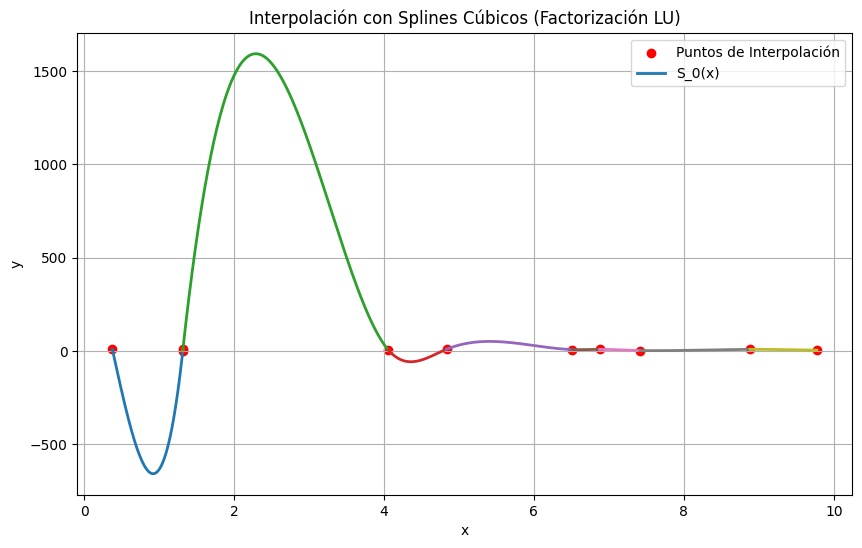

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

def set_n():
    while True:
        try:
            n_str = input("Ingrese el número de puntos n (entre 8 y 12): ")
            n = int(n_str)
            if 8 <= n <= 12:
                return n
            else:
                print("n debe estar entre 8 y 12.")
        except ValueError:
            print("Por favor, ingrese un número entero.")

def generate_ordered_pairs(n):
    x_coords = sorted([random.uniform(0, 10) for _ in range(n)])
    y_coords = [random.uniform(0, 10) for _ in range(n)]
    return list(zip(x_coords, y_coords))

def get_h(ordered_pairs):
    h = [ordered_pairs[i+1][0] - ordered_pairs[i][0] for i in range(len(ordered_pairs) - 1)]
    return h

def get_left_side_matrix(h):
    n = len(h) + 1
    if n < 3:
        return []
    size = n - 2
    left_side_matrix = [[0.0] * size for _ in range(size)]
    for i in range(size):
        if i > 0:
            left_side_matrix[i][i - 1] = h[i]
        left_side_matrix[i][i] = 2 * (h[i] + h[i + 1])
        if i < size - 1:
            left_side_matrix[i][i + 1] = h[i + 1]
    return left_side_matrix

def get_right_side_matrix(h, ordered_pairs):
    n = len(ordered_pairs)
    if n < 3:
        return []
    right_side = [0.0] * (n - 2)
    for i in range(n - 2):
        term1 = (ordered_pairs[i + 2][1] - ordered_pairs[i + 1][1]) / h[i + 1]
        term2 = (ordered_pairs[i + 1][1] - ordered_pairs[i][1]) / h[i]
        right_side[i] = 3 * (term1 - term2)
    return right_side

def lu_factorization(A):
    n = len(A)
    L = [[0.0] * n for _ in range(n)]
    U = [[0.0] * n for _ in range(n)]

    for i in range(n):
        L[i][i] = 1.0
        for j in range(i, n):
            sum_val = sum(L[i][k] * U[k][j] for k in range(i))
            U[i][j] = A[i][j] - sum_val

        for j in range(i + 1, n):
            sum_val = sum(L[j][k] * U[k][i] for k in range(i))
            if U[i][i] == 0:
                raise ValueError("Matriz singular: no se puede realizar la factorización LU.")
            L[j][i] = (A[j][i] - sum_val) / U[i][i]

    return L, U

def lu_solve(L, U, b):
    n = len(b)
    y = [0.0] * n

    # Sustitución hacia adelante (Ly = b)
    for i in range(n):
        sum_ly = sum(L[i][j] * y[j] for j in range(i))
        y[i] = (b[i] - sum_ly) / L[i][i]

    x = [0.0] * n

    # Sustitución hacia atrás (Ux = y)
    for i in range(n - 1, -1, -1):
        sum_ux = sum(U[i][j] * x[j] for j in range(i + 1, n))
        if U[i][i] == 0:
            raise ValueError("Matriz singular: no se puede realizar la sustitución hacia atrás.")
        x[i] = (y[i] - sum_ux) / U[i][i]

    return x

def SEL_solver(h, ordered_pairs):
    A = get_left_side_matrix(h)
    b = get_right_side_matrix(h, ordered_pairs)
    n_eq = len(b)

    if not A or not b or len(A) != n_eq or len(A[0]) != n_eq:
        return [0.0] * (len(ordered_pairs)) # Handle edge cases

    try:
        L, U = lu_factorization(A)
        m_interior = lu_solve(L, U, b)
        return [0.0] + m_interior + [0.0] # Natural spline: m_0 = m_{n-1} = 0
    except ValueError as e:
        print(f"Error al resolver el sistema con LU: {e}")
        return [0.0] * (len(ordered_pairs))

def main():
    print("-" * 40)
    print("Interpolación con Splines Cúbicos (Factorización LU)")
    print("-" * 40)

    n = set_n()
    ordered_pairs = generate_ordered_pairs(n)
    x_coords = [p[0] for p in ordered_pairs]
    y_coords = [p[1] for p in ordered_pairs]
    h = get_h(ordered_pairs)

    print("\n--- Puntos Generados ---")
    for i, (x, y) in enumerate(ordered_pairs):
        print(f"P{i+1}: ({x:.2f}, {y:.2f})")
    print("-" * 40)

    m = SEL_solver(h, ordered_pairs)

    print("\n--- Coeficientes de los Polinomios Cúbicos (Procedimiento Detallado para todos los intervalos) ---")
    for i in range(n - 1):
        h_i = h[i]
        y_i = y_coords[i]
        y_ip1 = y_coords[i + 1]
        m_i = m[i]
        m_ip1 = m[i + 1]
        x_i = x_coords[i]
        x_ip1 = x_coords[i + 1]

        print(f"Intervalo x ∈ [{x_i:.2f}, {x_ip1:.2f}]:")
        print(f"  h_{i} = {h_i:.4f}, y_{i} = {y_i:.4f}, y_{i+1} = {y_ip1:.4f}, m_{i} = {m_i:.4f}, m_{i+1} = {m_ip1:.4f}")

        # Cálculo de a_i
        a_i_num = m_ip1 - m_i
        a_i_den = 6 * h_i
        a_i = a_i_num / a_i_den
        print(f"  a_{i} = (m_{i+1} - m_{i}) / (6 * h_{i}) = ({m_ip1:.4f} - {m_i:.4f}) / (6 * {h_i:.4f}) = {a_i:.4f}")

        # Cálculo de b_i
        b_i = m_i / 2
        print(f"  b_{i} = m_{i} / 2 = {m_i:.4f} / 2 = {b_i:.4f}")

        # Cálculo de c_i
        c_i_term1 = (y_ip1 - y_i) / h_i
        c_i_term2 = h_i * (m_ip1 + 2 * m_i) / 6
        c_i = c_i_term1 - c_i_term2
        print(f"  c_{i} = (y_{i+1} - y_{i}) / h_{i} - h_{i} * (m_{i+1} + 2 * m_{i}) / 6")
        print(f"    = ({y_ip1:.4f} - {y_i:.4f}) / {h_i:.4f} - {h_i:.4f} * ({m_ip1:.4f} + 2 * {m_i:.4f}) / 6 = {c_i:.4f}")

        # Cálculo de d_i
        d_i = y_i
        print(f"  d_{i} = y_{i} = {d_i:.4f}")

        print(f"  S_{i}(x) = {a_i:.4f}(x - {x_i:.4f})^3 + {b_i:.4f}(x - {x_i:.4f})^2 + {c_i:.4f}(x - {x_i:.4f}) + {d_i:.4f}")
        print("-" * 40)

    # --- Visualización con Matplotlib ---
    plt.figure(figsize=(10, 6))
    plt.scatter(x_coords, y_coords, color='red', marker='o', label='Puntos de Interpolación')

    x_fine = np.linspace(min(x_coords), max(x_coords), 1000)
    for i in range(n - 1):
        start_x = x_coords[i]
        end_x = x_coords[i + 1]
        x_interval = np.linspace(start_x, end_x, 200)
        h_i = h[i]
        y_i = y_coords[i]
        y_ip1 = y_coords[i + 1]
        m_i = m[i]
        m_ip1 = m[i + 1]
        a_i = (m_ip1 - m_i) / (6 * h_i)
        b_i = m_i / 2
        c_i = (y_ip1 - y_i) / h_i - h_i * (m_ip1 + 2 * m_i) / 6
        d_i = y_i
        y_interval = a_i * (x_interval - start_x)**3 + b_i * (x_interval - start_x)**2 + c_i * (x_interval - start_x) + d_i
        plt.plot(x_interval, y_interval, label=f'S_{i}(x)' if i == 0 else "", linewidth=2)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación con Splines Cúbicos (Factorización LU)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()